In [2]:
#directories
import os
try:
    parentdir
except NameError:
    parentdir=os.getcwd()
else:
    parentdir = parentdir
homedir=r'/home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime/';#data directory
print('The working directory is parentdir: %s' %parentdir)
print('The data directory is homedir: %s' %homedir)

The working directory is parentdir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/Azurin_SM_repo/Analysis
The data directory is homedir: /home/biswajit/Research/Reports_ppt/reports/AzurinSM-MS4/data/S105d15May17_60.5%635_A1_CuAzu655_longtime/


In [3]:
#Run this once to run the .py file.
os.chdir(parentdir)
!python Analysis_bis.py
%run Analysis_bis.py
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [4]:
mpl.rcParams["font.family"] = "sans-serif"
mpl.rcParams["font.size"] = "14"

## List of Point

In [7]:
pd.set_option('display.max_columns', 500)

In [8]:
point_list(foldername=homedir)

,Point_4,Point_5,Point_6,Point_7,Point_8,Point_9,Point_10,Point_11,Point_12,Point_13,Point_14,Point_15,Point_16,Point_17,Point_18,Point_19,Point_20,Point_21,Point_22,Point_23,Point_24,Point_25,Point_26,Point_27
0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,25.0,50.0,50.0,50.0,50.0,50.0,75.0,75.0,75.0,75.0,75.0,100.0,100.0,100.0,100.0


## Time trace plot

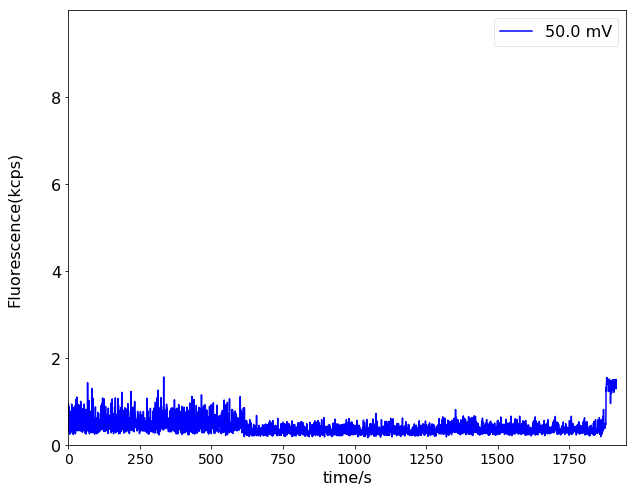

In [66]:
fig = time_trace_plot(foldername= homedir, input_potential=[50], pointnumbers=[16],
                      x_lim_min=0, y_lim_min=0, x_lim_max=1950, y_lim_max=10, bin=500, show_changepoint=False)

## Dynamics: rates with time

For 50 mV (Point_16, 1900s trace), dynamics is seen in the trace.

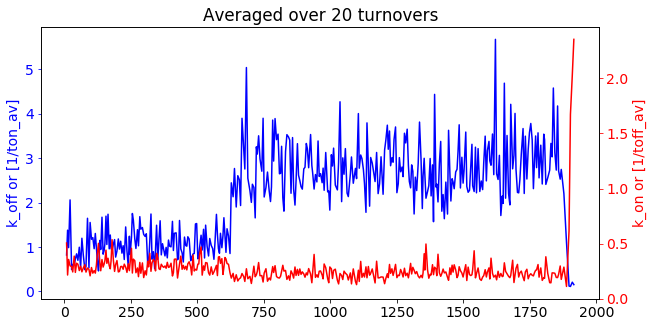

In [106]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[50], pointnumbers=[16],
                          bins_on=50, range_on=[0, 0.01], bins_off=100, range_off=[0, 1], plotting=False)

sum_points = 20;
num_outputs = int(len(t_ons)/sum_points)
start = 0;
t_av_on = []; t_av_off = []; t_abs = [];
for i in range(num_outputs):
    t_av_on_temp = sum(t_ons[start:start+sum_points])
    t_av_of_temp = sum(t_offs[start:start+sum_points])
    start += sum_points
    t_av_on.append(t_av_on_temp)
    t_av_off.append(t_av_of_temp)
    t_abs_temp = sum(t_ons[:start+sum_points]) + sum(t_offs[:start+sum_points])
    t_abs.append(t_abs_temp)
t_av_on = pd.Series(t_av_on);
t_av_off = pd.Series(t_av_off)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(t_abs, 1/t_av_on, 'b')
ax.tick_params('y', colors='b')
ax.set_ylabel('k_off or [1/ton_av]', color='b')

ax_r = ax.twinx()
ax_r.plot(t_abs, 1/t_av_off, 'r')
ax_r.tick_params('y', colors='r')
ax_r.set_ylabel('k_on or [1/toff_av]', color='r')

ax.set_title('Averaged over '+str(sum_points)+' turnovers')
# ax.set_xlim(50, None)

## 2D On_off histogram function

In [333]:
def hist2D_on_off(foldername=foldername, input_potential=[100], pointnumbers=[24], bins_on=40, range_on=[0, 0.01], bins_off=50, range_off=[0, 1], x_shift=10, plots=True):
    
    t_ons = []; t_offs=[];
    for i in pointnumbers:
        t_on_temp, t_off_temp = histogram_on_off_1mol(foldername= foldername, input_potential=input_potential, pointnumbers=[i], plotting=False)
        t_ons = np.concatenate((t_ons, t_on_temp), axis=0)
        t_offs = np.concatenate((t_offs, t_off_temp), axis=0)
    
    t_ons=pd.Series(t_ons);t_offs=pd.Series(t_offs)
    t_on_shifted_1 = t_ons.shift(+1) ## shift up
    t_on_delay_1 = pd.DataFrame([t_on_shifted_1, t_ons]); t_on_delay_1=t_on_delay_1.T
    t_on_delay_1 = t_on_delay_1.dropna();
    t_off_shifted_1 = t_offs.shift(+1) ## shift up

    t_on_shifted_x = t_ons.shift(+x_shift) ## shift up
    t_off_shifted_x = t_offs.shift(+x_shift) ## shift up
    print('Number of on events: %d' %len(t_ons))
    print('Number of off events: %d' %len(t_offs))
    if plots==True:
        import matplotlib as mpl
        colormap=mpl.cm.RdBu_r
        fig = plt.figure(figsize=(16,8))
        
        ax1 = fig.add_subplot(2,3,1)#2,2,1
        C_on_1,Ex_on_1,Ey_on_1, figu = hist2d(t_on_shifted_1[1:], t_ons[1:], range=[range_on, range_on], bins=bins_on, norm=mpl.colors.LogNorm(), cmap=colormap)
        Ex_on_1,Ey_on_1 = meshgrid(Ex_on_1,Ey_on_1)
        #ax1.pcolormesh(Ex_on_1, Ey_on_1, C_on_1, cmap=colormap)#,norm=mpl.colors.LogNorm()
        colorbar()
        ax1.set_title('ON time Cu-Azu %smV' %input_potential)
        ax1.set_xlabel(r'$\tau_{on}/s$')
        ax1.set_ylabel(r'$\tau_{on}+1/s$')

        ax2 = fig.add_subplot(2,3,2)#2,2,1
        C_on_x,Ex_on_x,Ey_on_x, figu = hist2d(t_on_shifted_x[x_shift:], t_ons[x_shift:], range=[range_on, range_on], bins=bins_on, norm=mpl.colors.LogNorm(), cmap=colormap)
        Ex_on_x,Ey_on_x = meshgrid(Ex_on_x,Ey_on_x)
        #ax2.pcolormesh(Ex_on_x, Ey_on_x, C_on_x, cmap=colormap)#,norm=mpl.colors.LogNorm()
        colorbar()
        ax2.set_title('ON time Cu-Azu %smV' %input_potential)
        ax2.set_xlabel(r'$\tau_{on}/s$')
        ax2.set_ylabel(r'$\tau_{on}+%s/s$'%x_shift)
        
        ax3 = fig.add_subplot(2,3,3)
        C_on_diff = C_on_1-C_on_x;
        pcm=ax3.pcolormesh(Ex_on_x, Ey_on_x, C_on_diff,
                       norm=mpl.colors.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=C_on_diff.min(), vmax=C_on_diff.max()), cmap=colormap)
        fig.colorbar(pcm, ax=ax3, extend='max')
        
        ax4 = fig.add_subplot(2,3,4)
        C_off_1, Ex_off_1, Ey_off_1, figu= hist2d(t_off_shifted_1[1:], t_offs[1:], range=[range_off, range_off],bins=bins_off, norm=mpl.colors.LogNorm(), cmap=colormap);#, norm=mpl.colors.LogNorm()
        Ex_off_1, Ey_off_1 = meshgrid(Ex_off_1, Ey_off_1)
        colorbar()
        ax4.set_title('OFF time Cu-Azu %smV' %input_potential)
        ax4.set_xlabel(r'$\tau_{off}/s$')
        ax4.set_ylabel(r'$\tau_{off}+1/s$')

        ax5 = fig.add_subplot(2,3,5)
        C_off_x,Ex_off_x,Ey_off_x, figu = hist2d(t_off_shifted_x[x_shift:], t_offs[x_shift:], range=[range_off, range_off],bins=bins_off, norm=mpl.colors.LogNorm(), cmap=colormap);#, norm=mpl.colors.LogNorm()
        Ex_off_x,Ey_off_x = meshgrid(Ex_off_x,Ey_off_x)
        colorbar()
        ax5.set_title('OFF time Cu-Azu %smV' %input_potential)
        ax5.set_xlabel(r'$\tau_{off}/s$')
        ax5.set_ylabel(r'$\tau_{off}+%s/s$'%x_shift)
        
        ax6 = fig.add_subplot(2,3,6)
        C_off_diff=C_off_1-C_off_x
        pcm=ax6.pcolormesh(Ex_off_x, Ey_off_x, C_off_diff, norm=mpl.colors.SymLogNorm(linthresh=0.03, linscale=0.03,vmin=C_off_diff.min(), vmax=C_off_diff.max()), cmap=colormap)
        fig.colorbar(pcm, ax=ax6, extend='max')
        plt.tight_layout()
    return(t_ons, t_offs)

### 100 mV

#### Point_24: 1200 s

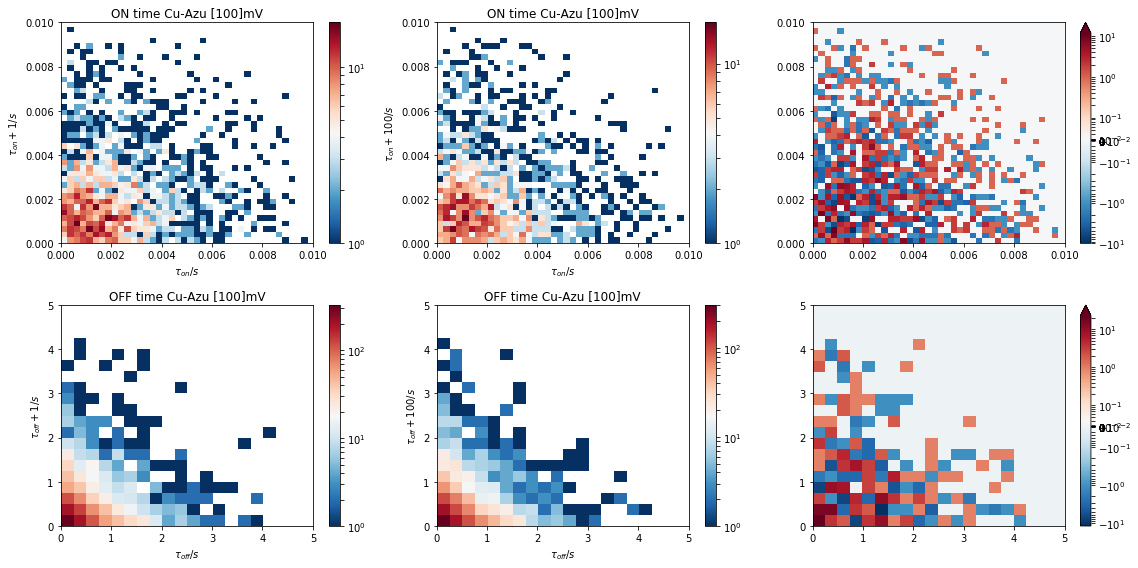

In [321]:
C_on_diff, C_off_diff = hist2D_on_off(foldername=homedir, input_potential=[100], pointnumbers=[24], bins_on=40, range_on=[0, 0.01], bins_off=20, range_off=[0, 5], x_shift=100, plots=True)

#### all molecules

Number of on events: 3481
Number of off events: 3473


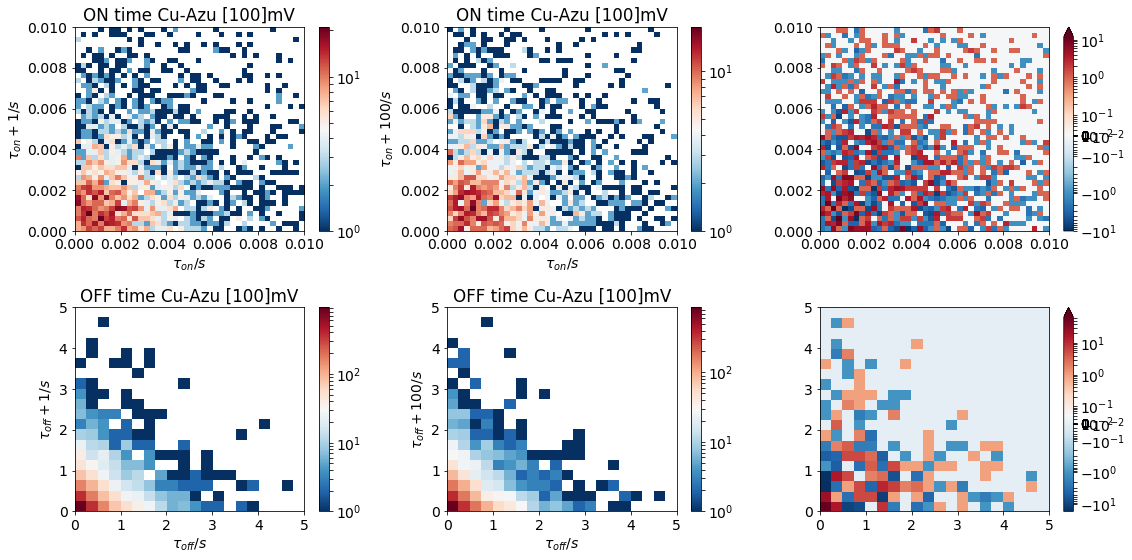

In [13]:
C_on_diff, C_off_diff = hist2D_on_off(foldername=homedir, input_potential=[100], pointnumbers=range(50), bins_on=40, range_on=[0, 0.01], bins_off=20, range_off=[0, 5], x_shift=100, plots=True)

### 75 mV

#### Point_20: 900 s

Number of on events: 3285
Number of off events: 3283


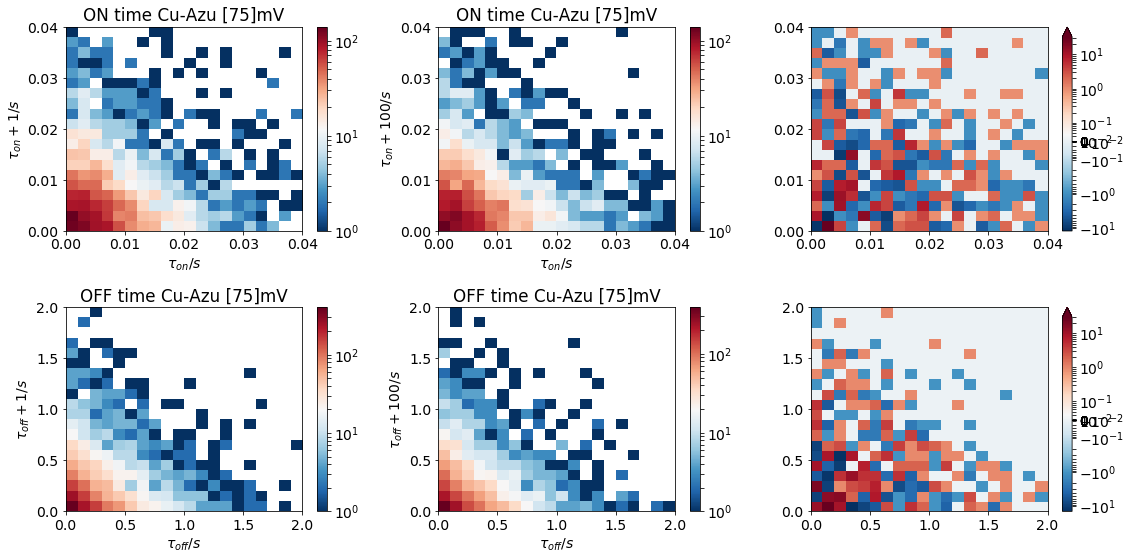

In [22]:
C_on_diff, C_off_diff = hist2D_on_off(foldername=homedir, input_potential=[75], pointnumbers=[20], bins_on=20, range_on=[0, 0.04], bins_off=20, range_off=[0, 2], x_shift=100, plots=True)

#### all molecules

Number of on events: 8850
Number of off events: 8840


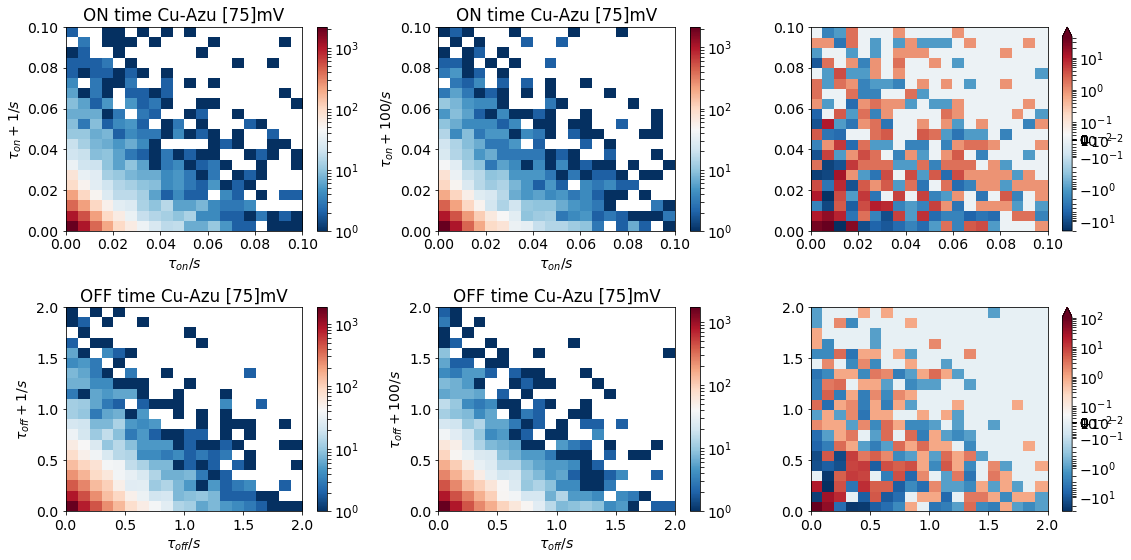

In [25]:
C_on_diff, C_off_diff = hist2D_on_off(foldername=homedir, input_potential=[75], pointnumbers=range(50), bins_on=20, range_on=[0, 0.1], bins_off=20, range_off=[0, 2], x_shift=100, plots=True)

### 50 mV

#### Point_16: 1900 s

Number of on events: 7896
Number of off events: 7894


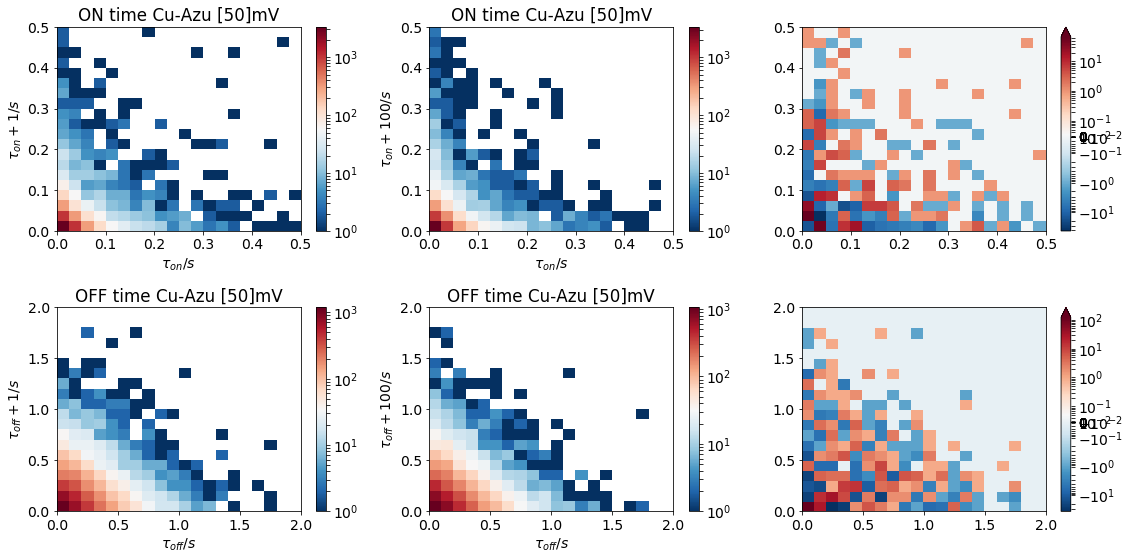

In [16]:
C_on_diff, C_off_diff = hist2D_on_off(foldername=homedir, input_potential=[50], pointnumbers=[16], bins_on=20, range_on=[0, 0.5], bins_off=20, range_off=[0, 2], x_shift=100, plots=True)

#### all molecules

Number of on events: 17501
Number of off events: 17491


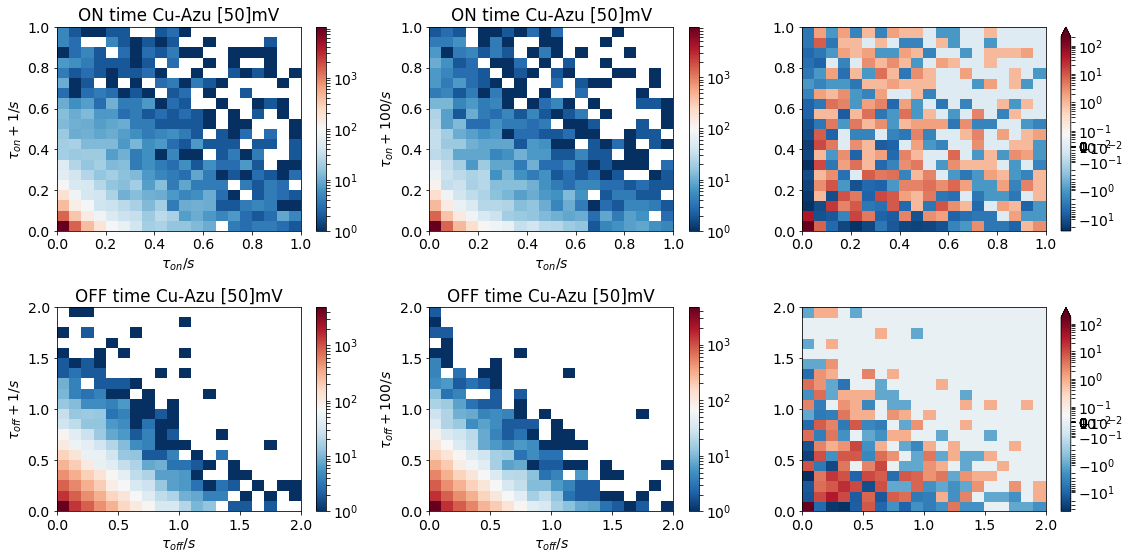

In [24]:
C_on_diff, C_off_diff = hist2D_on_off(foldername=homedir, input_potential=[50], pointnumbers=range(50), bins_on=20, range_on=[0, 1], bins_off=20, range_off=[0, 2], x_shift=100, plots=True)

## 1D on_off histogram

### 100 mV

#### Point_24: 1200 sec

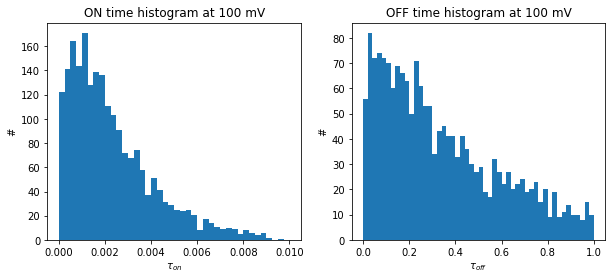

In [68]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[100], pointnumbers=[24], bins_on=40, range_on=[0, 0.01], bins_off=50, range_off=[0, 1], plotting=True)

### 75 mv

#### Point_20: 900 sec

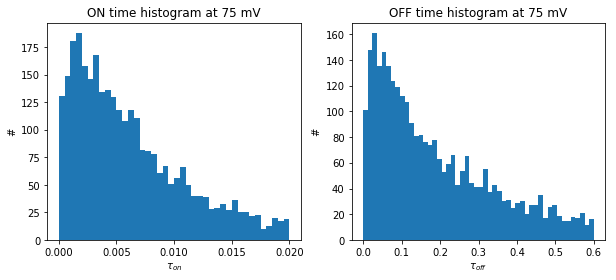

In [23]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[75], pointnumbers=[20], bins_on=40, range_on=[0, 0.02], bins_off=50, range_off=[0, 0.6], plotting=True)

#### point_22:900sec

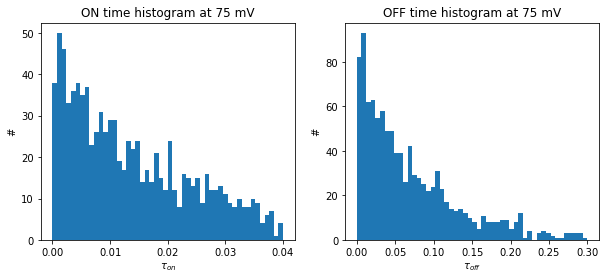

In [33]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[75], pointnumbers=[22], bins_on=50, range_on=[0, 0.04], bins_off=50, range_off=[0, 0.3], plotting=True)

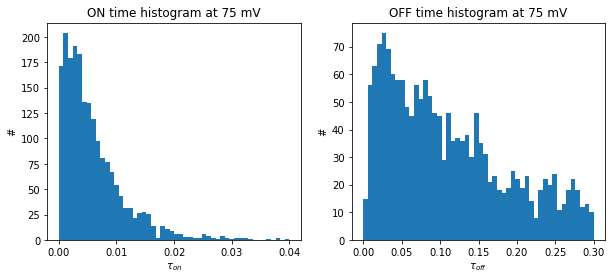

In [91]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[75], pointnumbers=[23], bins_on=50, range_on=[0, 0.04], bins_off=50, range_off=[0, 0.3], plotting=True)

### 50 mV

#### Point_16: 1920 sec

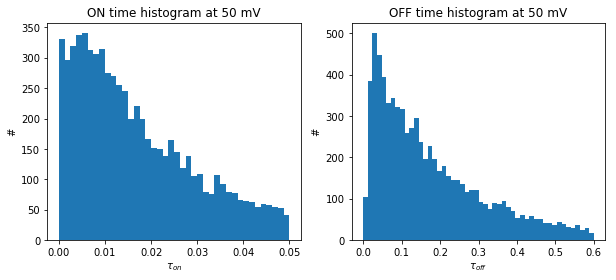

In [26]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[50], pointnumbers=[16], bins_on=40, range_on=[0, 0.05], bins_off=50, range_off=[0, 0.6], plotting=True)

### 25 mV

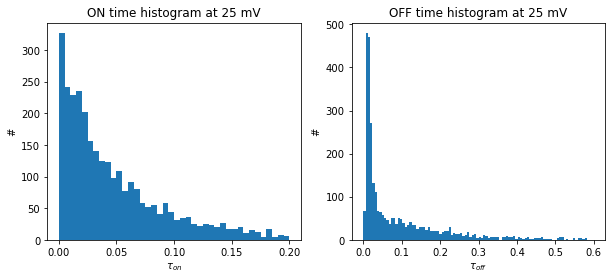

In [37]:
t_ons, t_offs = histogram_on_off_1mol(foldername= homedir, input_potential=[25], pointnumbers=[5], bins_on=40, range_on=[0, 0.2], bins_off=100, range_off=[0, 0.6], plotting=True)

## On-off histogram:all_point(folder)

# FCS analysis

A is 2.401 
t_ac is 37.455


(53.051616805522066, 127.40151201493138, 0.41641277223856216)

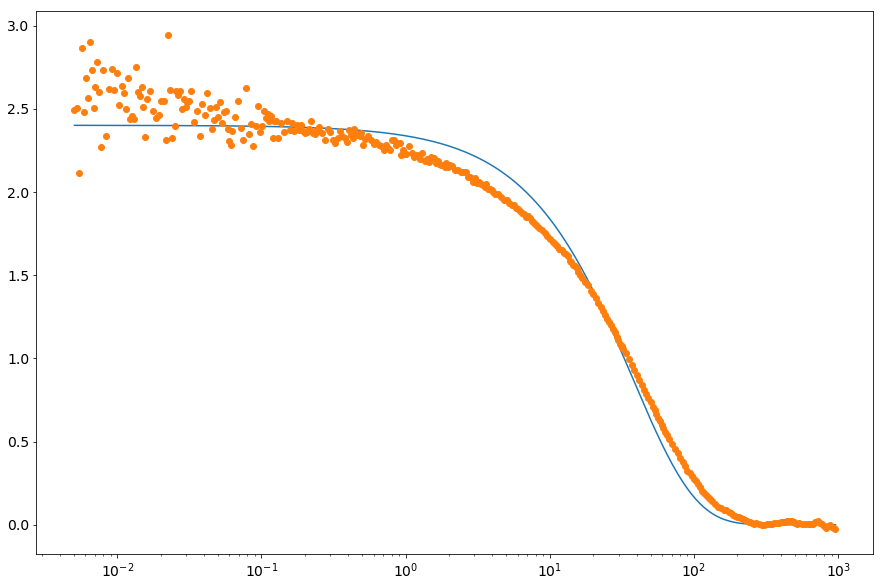

In [42]:
df_datn_em_specific, df_fcs_specific = get_point_specifics(foldername= homedir, input_potential=[50], pointnumbers=[14])
df_fcs=df_fcs_specific['filepath[FCS]'][0]
df_emplot = df_datn_em_specific['filepath[.em.plot]'][0]
df_datn = df_datn_em_specific['filepath[.datn]'][0]
figure(figsize=(15, 10))
def FCS_mono_fit(df_fcs,df_emplot, tmin=0.005,tmax=1000):
    df_fcs = pd.read_csv(df_fcs, index_col=False, names=None, skiprows=1, header=None, sep='\s+');
    df_fcs = df_fcs[df_fcs[0]>=tmin];
    df_fcs = df_fcs[df_fcs[0]<=tmax];
    xdata=df_fcs[0];
    ydata=df_fcs[1];
    df_em = pd.read_csv(df_emplot, header=None, sep='\t')#changepoint
    S=max(df_em[1]);
    Bkr=min(df_em[1]);
    correction_BG = (S/(S+Bkr))**2
    ydata= ((ydata)/correction_BG)
    def mono_exp(x, A, t_ac):
        return (A*exp(-x/t_ac))
    monofit, pcov = curve_fit(mono_exp, xdata, ydata, p0 = [1, 1], bounds=(0, np.inf))
    plot(xdata, mono_exp(xdata, *monofit))
    plot(xdata, ydata, 'o')
    xscale('log')
    A=monofit[0]; t_ac = monofit[1];
    print('A is %.3f \nt_ac is %.3f' %(A, t_ac))
    toff = t_ac*(1+A); ton = t_ac*(1+(1/A));
    tratio_on_off = ton/toff
    return(ton, toff, tratio_on_off, monofit)#, t_on_err, t_off_err
ton, toff, tratio_on_off, monofit = FCS_mono_fit(df_fcs, df_emplot)
ton, toff, tratio_on_off